# Creating all necessary directories

In [1]:
!mkdir data
!mkdir data/datasets
!mkdir data/results
!mkdir data/results/csv
!mkdir data/results/pkl

# Preprocess data

## Getting the list of terms generated after expanding the injury taxonomies

In [2]:
#Download Injuries Expansion Taxonomy

!gdown --id 1Cc5WK-vk8hk00ufs_CEpfi1E6ZTfN4gG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Cc5WK-vk8hk00ufs_CEpfi1E6ZTfN4gG
To: /content/injuries_expansion_taxonomy.csv
100% 6.40k/6.40k [00:00<00:00, 9.94MB/s]


In [3]:
import pandas as pd

df_injuries = pd.read_csv('injuries_expansion_taxonomy.csv',header=None,sep=';')
df_injuries.columns = ['injury','query']
df_injuries

,injury,query
0,burn,burned myself
1,burn,burned my face
2,burn,burned my hand
3,burn,burn myself
4,burn,burn my face
...,...,...
255,CO/CO2,CO alarm
256,CO/CO2,leaks CO2
257,CO/CO2,CO2 leak
258,CO/CO2,CO2 alarms


## Collecting data from SaferProduct

In [4]:
!wget https://www.saferproducts.gov/SPDB.zip

--2022-09-04 19:14:14--  https://www.saferproducts.gov/SPDB.zip
Resolving www.saferproducts.gov (www.saferproducts.gov)... 63.74.109.172
Connecting to www.saferproducts.gov (www.saferproducts.gov)|63.74.109.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31220236 (30M) [application/x-zip-compressed]
Saving to: ‘SPDB.zip’

SPDB.zip            100%[===================>]  29.77M  1.36MB/s    in 22s     

2022-09-04 19:14:38 (1.32 MB/s) - ‘SPDB.zip’ saved [31220236/31220236]



In [5]:
!unzip SPDB.zip

Archive:  SPDB.zip
  inflating: Disclaimer.txt          
  inflating: IncidentReports.csv     
  inflating: Recalls.csv             


In [6]:
df_safety = pd.read_csv('IncidentReports.csv',skiprows=[0],encoding='iso8859-2')
df_safety

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Submitter Has Product,Product Was Damaged Before Incident,Damage Description,Damage Repaired,Product Was Modified Before Incident,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers
0,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,Yes,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN
1,20220726-3CD84-2147354774,7/26/2022,8/1/2022,8/15/2022,Consumer,Generac 22kw whole home generator,Home Maintenance and Structures,Electrical Systems,Generators or Power Plants (606),606,...,Yes,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/12/2022) GENERAC POWER SYSTEMS, INC.: Gener...",NaN
2,20220726-3DDF8-2147354772,7/26/2022,8/1/2022,8/15/2022,Consumer,Generac 22kw,Home Maintenance and Structures,Electrical Systems,Generators or Power Plants (606),606,...,Yes,No,NaN,NaN,NaN,No,NaN,Generator does what it is supposed to do. Just...,"(8/12/2022) GENERAC POWER SYSTEMS, INC.: Gener...",NaN
3,20220726-F0010-2147354761,7/26/2022,8/1/2022,8/15/2022,Consumer,2019 Polaris General 4 (side x side),Sports and Recreation,Recreational Vehicles (Unlicensed),Utility Vehicles (5044),5044,...,Yes,No,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,20220726-F6D09-2147354760,7/26/2022,8/1/2022,8/15/2022,Consumer,Cummins 18 kw home standby generator. Operates...,Home Maintenance and Structures,Electrical Systems,Generators or Power Plants (606),606,...,Yes,No,NaN,NaN,NaN,No,NaN,There is no problem with the generator itself....,(8/3/2022) Cummins Inc.: Cummins advises insta...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51089,20110311-DBB63-2147481650,3/11/2011,NaN,4/1/2011,Consumer,"Pampers Swaddlers New Baby with Dry Max, Size 1-2",Baby,Nursery Equipment & Supplies,Diapers (1512),1512,...,No,No,NaN,NaN,No,Yes,NaN,I will be writing a letter to the company foll...,(4/1/2011) The Procter & Gamble Company: Thank...,NaN
51090,20110311-E518D-1170349,3/11/2011,NaN,4/1/2011,Consumer,Airzone Pop stick. Bright/ lime green with bla...,Toys & Children,Toys,Pogo Sticks (1310),1310,...,Yes,No,NaN,No,No,No,No,NaN,(3/31/2011) BRAVO SPORTS: Thank you for transm...,NaN
51091,20110313-2E80A-2147481520,3/13/2011,NaN,4/1/2011,Consumer,Beige colored dog toy which has a bone shaped ...,Toys & Children,Toys,"Dolls, Plush Toys, and Action Figures (1394)",1394,...,Yes,No,NaN,NaN,No,No,No,NaN,NaN,NaN
51092,20110313-26730-2147481529,3/13/2011,NaN,4/1/2011,Consumer,Toro CCR 3650 Snowblower,Yard & Garden,Gardening & Landscaping,"Snow Throwers, Blowers (1406)",1406,...,Yes,No,NaN,NaN,No,No,Yes,I plan on contacting a Toro authorized service...,NaN,NaN


## Extracting snippets (safer product)

In [7]:
import nltk
nltk.download('punkt')
from tqdm.notebook import tqdm

L = []
def isNaN(num):
    return num != num

for index,row in tqdm(df_safety.iterrows(), total=len(df_safety)):
  text = row['Incident Description']
  if isNaN(text)==False:

    sent_text = nltk.sent_tokenize(text) # this gives us a list of sentences
    # now loop over each sentence and tokenize it separately
    for sentence in sent_text:
      d = row.to_dict()
      d['snippet'] = sentence
      L.append(d)

df_data2 = pd.DataFrame(L)
df_data2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/51094 [00:00<?, ?it/s]

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Product Was Damaged Before Incident,Damage Description,Damage Repaired,Product Was Modified Before Incident,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet
0,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN,The product label on our new washer/dryer unit...
1,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN,"Specifications (found on the website, not foun..."
2,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN,Email to support confirms that the label is wr...
3,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN,Relying on the label and running both parts at...
4,20220627-B1590-2147355386,6/27/2022,8/1/2022,8/15/2022,Consumer,combination washer/dryer,Home Maintenance and Structures,"Laundry, Fabric Care & Sewing","Washing Machines, Other or Not Specified (140)",140,...,No,NaN,NaN,NaN,Yes,NaN,NaN,"(8/2/2022) LG Electronics, USA: LG manufacture...",NaN,Description of risk of harm:\r\nfire risk from...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376934,20110311-6B7FC-2147481644,3/11/2011,NaN,4/1/2011,Consumer,Harman Oakwood Freestanding wood stove. Manufa...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Coal or Wood-burning Stoves (367),367,...,No,NaN,NaN,No,No,No,The stove weighs 500 pounds. It isn't going an...,NaN,NaN,"The rest are ""untouchable"" according to my dea..."
376935,20110311-6B7FC-2147481644,3/11/2011,NaN,4/1/2011,Consumer,Harman Oakwood Freestanding wood stove. Manufa...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Coal or Wood-burning Stoves (367),367,...,No,NaN,NaN,No,No,No,The stove weighs 500 pounds. It isn't going an...,NaN,NaN,I suspect that there is a leak at one of these...
376936,20110311-6B7FC-2147481644,3/11/2011,NaN,4/1/2011,Consumer,Harman Oakwood Freestanding wood stove. Manufa...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Coal or Wood-burning Stoves (367),367,...,No,NaN,NaN,No,No,No,The stove weighs 500 pounds. It isn't going an...,NaN,NaN,I believe my dealer is acting in good faith an...
376937,20110311-6B7FC-2147481644,3/11/2011,NaN,4/1/2011,Consumer,Harman Oakwood Freestanding wood stove. Manufa...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Coal or Wood-burning Stoves (367),367,...,No,NaN,NaN,No,No,No,The stove weighs 500 pounds. It isn't going an...,NaN,NaN,"However, I do believe there is a design defect..."


## Selecting data considering injuries taxonomy

In [8]:
from tqdm.notebook import tqdm

L = []
for index,row in tqdm(df_injuries.iterrows(),total=len(df_injuries)):
  q = ['','']
  q[0] = row['injury']
  q[1] = row['query']
  df_temp = df_data2[df_data2['snippet'].str.contains(' '+q[1])].drop_duplicates()
  df_temp['risk_type'] = [q[0]]*len(df_temp)
  df_temp['risk_context'] = [q[1]]*len(df_temp)
  L.append(df_temp)

  0%|          | 0/260 [00:00<?, ?it/s]

In [9]:
df_safety = pd.concat(L)
df_safety

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Damage Repaired,Product Was Modified Before Incident,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet,risk_type,risk_context
1770,20220630-BF569-2147355299,6/30/2022,7/5/2022,7/19/2022,Consumer,Samsung Gas Slide-In Range model # NX58N9420SG...,Kitchen,Appliances,Gas Ranges or Ovens (279),279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I nearly burned myself discovering later that ...,burn,burned myself
2644,20220612-F72FD-2147355647,6/12/2022,6/16/2022,7/1/2022,Consumer,Whirlpool 10.0 cu. ft. Smart Double Wall Oven ...,Kitchen,Appliances,Other Ranges or Ovens (280),280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It starts to move up after opening and I almos...,burn,burned myself
12514,20211231-E74DF-2147358231,12/31/2021,1/10/2022,1/25/2022,Consumer,Black & Decker Pro Series 240-Volt 27-kW 5.8GP...,Home Maintenance and Structures,Plumbing & Bath,Electric Water Heaters (119),119,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Unit will fluctuate from cold water to scorchi...,burn,burned myself
21197,20210729-78869-2147361519,7/29/2021,8/2/2021,8/16/2021,Consumer,Better Homes and Garden Wall Accent Wax Warmer...,Home Maintenance and Structures,"Household Chemicals, Paint, & Cleaning Products",Solid Room Deodorizers or Fresheners (974),974,...,NaN,NaN,No,NaN,NaN,NaN,NaN,I took it out of the wall and almost burned my...,burn,burned myself
29572,20210325-0A151-2147365181,3/25/2021,4/2/2021,4/16/2021,Consumer,Crock-Pot 7-Quart Oval Manual Slow Cooker | St...,Kitchen,Appliances,Slow Cookers (268),268,...,NaN,NaN,NaN,NaN,NaN,"(4/21/2021) Sunbeam Products, Inc. d/b/a Jard...",NaN,"As a result, I unexpectedly burned myself and ...",burn,burned myself
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346930,20110921-78EE4-1202217,9/21/2011,9/29/2011,10/14/2011,Consumer,Gas Furnace,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Gas Furnaces (310),310,...,NaN,NaN,NaN,NaN,NaN,(10/10/2011) Weil-McLain: Weil-McLain was noti...,NaN,There has been more that 5 CO alarms at our home.,CO/CO2,CO alarm
224873,20140402-1FEAA-2147445833,4/2/2014,4/10/2014,5/1/2014,Consumer,White Nest Protect 120v Wired - with Battery B...,Home Maintenance and Structures,Home Security,Carbon Monoxide Detectors (712),712,...,NaN,No,Yes,NaN,"I still own the protect, and I have contacted ...","(4/23/2014) Nest Labs, Inc.: Thank you for the...",NaN,I have 4 Nest Protect Smoke and CO2 alarms thr...,CO/CO2,CO2 alarms
81058,20181206-67C3D-2147383933,12/6/2018,2/1/2019,2/15/2019,Consumer,Envi wall heater HH1012T set on fire last nigh...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Portable Electric Heaters (348),348,...,NaN,No,No,Yes,NaN,NaN,NaN,Luckily we had a Smoke/ CO2 alarm in the child...,CO/CO2,CO2 alarm
224873,20140402-1FEAA-2147445833,4/2/2014,4/10/2014,5/1/2014,Consumer,White Nest Protect 120v Wired - with Battery B...,Home Maintenance and Structures,Home Security,Carbon Monoxide Detectors (712),712,...,NaN,No,Yes,NaN,"I still own the protect, and I have contacted ...","(4/23/2014) Nest Labs, Inc.: Thank you for the...",NaN,I have 4 Nest Protect Smoke and CO2 alarms thr...,CO/CO2,CO2 alarm


In [10]:
df_safety['(Primary) Victim Severity'].unique()

array(['Incident, No Injury',
       'Injury, First Aid Received by Non-Medical Professional',
       'Injury, No First Aid or Medical Attention Received',
       'Injury, Seen by Medical Professional',
       'Injury, Hospital Admission',
       'Injury, Emergency Department Treatment Received',
       'No Incident, No Injury', 'Injury, Level of care not known',
       'Unspecified', 'Death'], dtype=object)

In [11]:
L = []
for index,row in df_safety.iterrows():

  t = row['(Primary) Victim Severity']
  impact = -1
  
  if t == 'No Incident, No Injury': impact = 0
  if t == 'Unspecified': impact = 0

  if t == 'Incident, No Injury': impact = 0

  if t == 'Injury, No First Aid or Medical Attention Received': impact = 1
  if t == 'Injury, Level of care not known': impact = 1

  if t == 'Injury, Seen by Medical Professional': impact = 1
  if t == 'Injury, First Aid Received by Non-Medical Professional': impact = 1

  if t == 'Injury, Hospital Admission': impact = 1
  if t == 'Injury, Emergency Department Treatment Received': impact = 1

  if t == 'Death': impact = 1

  L.append(impact)

df_safety['severity_level'] = L
df_safety

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Product Was Modified Before Incident,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet,risk_type,risk_context,severity_level
1770,20220630-BF569-2147355299,6/30/2022,7/5/2022,7/19/2022,Consumer,Samsung Gas Slide-In Range model # NX58N9420SG...,Kitchen,Appliances,Gas Ranges or Ovens (279),279,...,NaN,NaN,NaN,NaN,NaN,NaN,I nearly burned myself discovering later that ...,burn,burned myself,0
2644,20220612-F72FD-2147355647,6/12/2022,6/16/2022,7/1/2022,Consumer,Whirlpool 10.0 cu. ft. Smart Double Wall Oven ...,Kitchen,Appliances,Other Ranges or Ovens (280),280,...,NaN,NaN,NaN,NaN,NaN,NaN,It starts to move up after opening and I almos...,burn,burned myself,0
12514,20211231-E74DF-2147358231,12/31/2021,1/10/2022,1/25/2022,Consumer,Black & Decker Pro Series 240-Volt 27-kW 5.8GP...,Home Maintenance and Structures,Plumbing & Bath,Electric Water Heaters (119),119,...,NaN,Yes,NaN,NaN,NaN,NaN,Unit will fluctuate from cold water to scorchi...,burn,burned myself,0
21197,20210729-78869-2147361519,7/29/2021,8/2/2021,8/16/2021,Consumer,Better Homes and Garden Wall Accent Wax Warmer...,Home Maintenance and Structures,"Household Chemicals, Paint, & Cleaning Products",Solid Room Deodorizers or Fresheners (974),974,...,NaN,No,NaN,NaN,NaN,NaN,I took it out of the wall and almost burned my...,burn,burned myself,0
29572,20210325-0A151-2147365181,3/25/2021,4/2/2021,4/16/2021,Consumer,Crock-Pot 7-Quart Oval Manual Slow Cooker | St...,Kitchen,Appliances,Slow Cookers (268),268,...,NaN,NaN,NaN,NaN,"(4/21/2021) Sunbeam Products, Inc. d/b/a Jard...",NaN,"As a result, I unexpectedly burned myself and ...",burn,burned myself,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346930,20110921-78EE4-1202217,9/21/2011,9/29/2011,10/14/2011,Consumer,Gas Furnace,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Gas Furnaces (310),310,...,NaN,NaN,NaN,NaN,(10/10/2011) Weil-McLain: Weil-McLain was noti...,NaN,There has been more that 5 CO alarms at our home.,CO/CO2,CO alarm,1
224873,20140402-1FEAA-2147445833,4/2/2014,4/10/2014,5/1/2014,Consumer,White Nest Protect 120v Wired - with Battery B...,Home Maintenance and Structures,Home Security,Carbon Monoxide Detectors (712),712,...,No,Yes,NaN,"I still own the protect, and I have contacted ...","(4/23/2014) Nest Labs, Inc.: Thank you for the...",NaN,I have 4 Nest Protect Smoke and CO2 alarms thr...,CO/CO2,CO2 alarms,0
81058,20181206-67C3D-2147383933,12/6/2018,2/1/2019,2/15/2019,Consumer,Envi wall heater HH1012T set on fire last nigh...,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Portable Electric Heaters (348),348,...,No,No,Yes,NaN,NaN,NaN,Luckily we had a Smoke/ CO2 alarm in the child...,CO/CO2,CO2 alarm,0
224873,20140402-1FEAA-2147445833,4/2/2014,4/10/2014,5/1/2014,Consumer,White Nest Protect 120v Wired - with Battery B...,Home Maintenance and Structures,Home Security,Carbon Monoxide Detectors (712),712,...,No,Yes,NaN,"I still own the protect, and I have contacted ...","(4/23/2014) Nest Labs, Inc.: Thank you for the...",NaN,I have 4 Nest Protect Smoke and CO2 alarms thr...,CO/CO2,CO2 alarm,0


In [12]:
df_safety[df_safety.severity_level==-1]

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Product Was Modified Before Incident,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet,risk_type,risk_context,severity_level


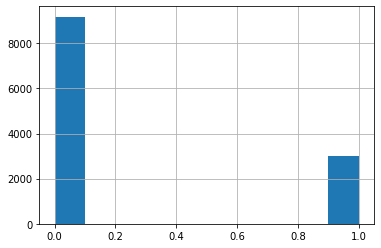

In [13]:
df_safety.severity_level.hist()

In [14]:
df_safety[['risk_type','severity_level']].groupby('severity_level').count()

,risk_type
severity_level,
0,9175
1,3016


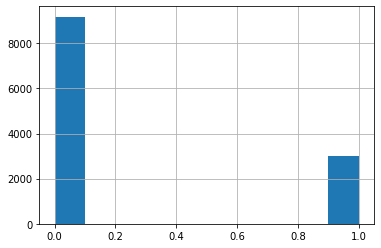

In [15]:
df_safety.severity_level.hist()

In [16]:
df_safety['Product Category'].unique()

array(['Kitchen', 'Home Maintenance and Structures', 'Yard & Garden',
       'Sports and Recreation', 'Personal Care', 'Electronics',
       'Fuel, Lighters and Fireworks', 'Toys & Children',
       'Clothing and Accessories', 'Hobby',
       'Furniture, Furnishings & Decorations', 'Containers & Packaging',
       'Baby', 'Products at Public Facilities', 'Drywall'], dtype=object)

In [17]:
df_safety['Product Sub Category'].unique()

array(['Appliances', 'Plumbing & Bath',
       'Household Chemicals, Paint, & Cleaning Products',
       'Cookware & Tableware', 'Tools & Hardware', 'Grills & Accessories',
       'Track, Field & Exercise', 'Grooming', 'Audio & Radio',
       'Electrical Systems', 'Computers, Monitors, Projectors',
       'Laundry, Fabric Care & Sewing', 'Lighters & Matches',
       'Telephones, Cell Phones & Accessories',
       'Printers, Scanners, Copiers & Faxes', 'Batteries & Chargers',
       'Gadgets & Utensils', 'Gardening & Landscaping',
       'Heating, Ventilation & Air Conditioning',
       'Home Cleaning Appliances & Equipment', 'Outdoor Lighting', 'Toys',
       'Clothing', 'Pet Supplies', 'Indoor Lighting',
       'Lawn Mowers, Leaf Blowers and Lawn Vacuums', 'Other',
       'TV & Video', 'Cables, Surge & Power Protection', 'Home Security',
       'Seasonal Decorations', 'Candles', 'Pools & Water Sports',
       'Cameras & Camcorders', 'Recreational Vehicles (Unlicensed)',
       'Fuel S

In [18]:
df_safety['Product Type'].unique()

array(['Gas Ranges or Ovens (279)', 'Other Ranges or Ovens (280)',
       'Electric Water Heaters (119)',
       'Solid Room Deodorizers or Fresheners (974)', 'Slow Cookers (268)',
       'Other Cookware (465)',
       'Electric Ranges or Ovens (Excl Counter-top Ovens) (278)',
       'Refrigerators (276)', 'Sprayers, Not Elsewhere Classified (888)',
       'Charcoal or Wood-burning Grills (3218)',
       'Electric Kettles or Hot Pots (269)',
       'Personal Fitness/Activity Trackers (5038)', 'Hair Dryers (1602)',
       'Stereo or Hi-fi Components or Accessories (546)',
       'Electric Coffee Makers or Teapots (217)',
       'Electric Wire or Wiring Systems (Excl Panelboards Recept (4062)',
       'Dishwashers (214)', 'Ranges or Ovens, Not Specified (281)',
       'Computers (Equipment and Electronic Games) (557)',
       'Hair Curlers, Curling Irons, Clips & Hairpins (1682)',
       'Electric Blenders (215)', 'Electric Waffle Irons (235)',
       'Tableware & Accessories (excluding 

In [19]:
df_safety['Product Code'].unique()

array(['279', '280', '119', '974', '268', '465', '278', '276', '888',
       '3218', 269, 5038, 1602, 546, 888, 278, 268, 217, 4062, 214, 280,
       281, 557, 1682, 215, 235, 474, 412, 277, 276, 234, 1689, '550',
       '960', 571, 550, '571', '883', '436', '1413', '460', '884', '5038',
       '348', '1688', '216', '115', '639', '255', '264', '412', '4062',
       '466', '281', '1690', '557', '214', '5021', '1646', '217', '1715',
       '627', '4039', '474', 106, 460, 884, 216, 306, 1604, 140, 883, 628,
       1461, 466, 1688, 3229, 3248, 3218, 348, 264, 482, 365, 1394, 574,
       3249, 461, 855, 4083, 279, 392, 393, '714', '277', 112, 405, 896,
       452, '393', 380, 1711, 639, 436, '463', '140', '1448', '107',
       '3262', '1399', '334', '1107', '215', '365', '536', '546', '3248',
       '127', '306', '1290', '981', '482', '952', '1602', '275', '1645',
       '821', '1615', '132', '3233', '381', '3215', '1894', '606', '1452',
       '388', '5044', '106', '572', '4063', '1422', '

In [20]:
df_safety.to_pickle('data/datasets/df_safety.pkl')

## Building train/test

In [21]:
df_safety = df_safety.sample(frac=1, random_state = 42) # Random

training_size = 300

label_counters = {}

L = []
for index,row in df_safety.iterrows():
  label = row['severity_level']
  if label not in label_counters: label_counters[label] = 0
  if label_counters[label] < training_size:
    L.append('train')
    label_counters[label] += 1
  else: L.append('test')

df_safety['labeling']  = L
df_safety.to_pickle("data/datasets/dataset_random.pkl")
df_safety

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet,risk_type,risk_context,severity_level,labeling
256783,20130614-27870-2147455249,6/14/2013,6/24/2013,7/9/2013,Consumer,"The unit began putting off a strange odor, the...",Kitchen,Appliances,Freezers (Separate From Refrigerators) (263),263,...,No,Yes,We still have the unit at this moment; however...,NaN,NaN,Due to the burning/melting of the liner of thi...,fire,caught on fire,0,train
3794,20220527-B3050-2147355962,5/27/2022,6/3/2022,6/21/2022,Consumer,"It is a Oster Toaster, black with silver, an a...",Kitchen,Appliances,Toasters (234),234,...,No,NaN,NaN,"(6/21/2022) Sunbeam Products, Inc. d/b/a Jard...",NaN,I noticed other times the toaster would have a...,smell,burning smell,1,train
109227,20171124-2624A-2147395123,11/24/2017,12/11/2017,12/26/2017,Consumer,Revlon 1875 model RV473 Helen of Troy 125vac 6...,Personal Care,Grooming,Hair Dryers (1602),1602,...,No,No,NaN,(12/20/2017) Helen of Troy: Revlon licenses He...,NaN,Revlon 1875 model RV473 hair dryer caught on f...,fire,caught on fire,1,train
222942,20140421-3E940-1398474,4/21/2014,5/8/2014,5/22/2014,Consumer,Under the counter dishwasher\r\n\r\nModel #: ...,Kitchen,Appliances,Dishwashers (214),214,...,Yes,NaN,NaN,(5/8/2014) Sears Holdings Management Corporati...,NaN,"Immediately after, she saw blue sparks and bla...",fire,sparks,0,train
330355,20111229-265F0-2147471902,12/29/2011,1/9/2012,1/31/2012,Consumer,18 Inch Red Glitter Beeswax candles,"Furniture, Furnishings & Decorations",Candles,"Candles, Candlesticks and Other Candle Holders...",463,...,Yes,NaN,"holding product, linens, candle holders and ta...",NaN,NaN,The table cloth caught fire and quickly burned...,fire,caught fire,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128916,20161219-BA0DA-2147409171,12/19/2016,3/17/2017,3/31/2017,Consumer,Buderus Logamax Plus GB142,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Boilers (308),308,...,Yes,NaN,They are quick to deflect any responsibility. ...,NaN,NaN,Factory supplied flue pipe adaptor has melted ...,CO/CO2,monoxide,0,test
90670,20180405-34D82-1749437,4/5/2018,8/9/2018,8/23/2018,Consumer,dishwasher,Kitchen,Appliances,Dishwashers (214),214,...,No,Yes,NaN,NaN,NaN,After about 40 minutes when it was in the dryi...,fire,sparks,0,test
149950,20160713-50986-2147416907,7/13/2016,7/21/2016,8/8/2016,Consumer,SHARP Microwave Oven Drawer\r\nStainless steel...,Kitchen,Appliances,Microwave Ovens (264),264,...,Yes,NaN,I contacted Sharp for assistance with the micr...,(7/28/2016) SHARP ELECTRONICS CORPORATION: The...,NaN,I hopped online and noticed that there are an ...,fire,sparks,0,test
33041,20210128-2E1B6-2147366212,1/28/2021,2/26/2021,3/12/2021,Consumer,This is the Ninja Coffee Bar CF091 series. It...,Kitchen,Appliances,Electric Coffee Makers or Teapots (217),217,...,Yes,NaN,NaN,(3/10/2021) SharkNinja Operating LLC: The cust...,NaN,Our Ninja Coffee Bar coffee maker caught fire.,fire,caught fire,0,test


In [22]:
df_random = pd.read_pickle('data/datasets/dataset_random.pkl')
df_random

,Report No.,Report Date,Sent to Manufacturer / Importer / Private Labeler,Publication Date,Category of Submitter,Product Description,Product Category,Product Sub Category,Product Type,Product Code,...,Have You Contacted The Manufacturer,If Not Do You Plan To,Answer Explanation,Company Comments,Associated Report Numbers,snippet,risk_type,risk_context,severity_level,labeling
256783,20130614-27870-2147455249,6/14/2013,6/24/2013,7/9/2013,Consumer,"The unit began putting off a strange odor, the...",Kitchen,Appliances,Freezers (Separate From Refrigerators) (263),263,...,No,Yes,We still have the unit at this moment; however...,NaN,NaN,Due to the burning/melting of the liner of thi...,fire,caught on fire,0,train
3794,20220527-B3050-2147355962,5/27/2022,6/3/2022,6/21/2022,Consumer,"It is a Oster Toaster, black with silver, an a...",Kitchen,Appliances,Toasters (234),234,...,No,NaN,NaN,"(6/21/2022) Sunbeam Products, Inc. d/b/a Jard...",NaN,I noticed other times the toaster would have a...,smell,burning smell,1,train
109227,20171124-2624A-2147395123,11/24/2017,12/11/2017,12/26/2017,Consumer,Revlon 1875 model RV473 Helen of Troy 125vac 6...,Personal Care,Grooming,Hair Dryers (1602),1602,...,No,No,NaN,(12/20/2017) Helen of Troy: Revlon licenses He...,NaN,Revlon 1875 model RV473 hair dryer caught on f...,fire,caught on fire,1,train
222942,20140421-3E940-1398474,4/21/2014,5/8/2014,5/22/2014,Consumer,Under the counter dishwasher\r\n\r\nModel #: ...,Kitchen,Appliances,Dishwashers (214),214,...,Yes,NaN,NaN,(5/8/2014) Sears Holdings Management Corporati...,NaN,"Immediately after, she saw blue sparks and bla...",fire,sparks,0,train
330355,20111229-265F0-2147471902,12/29/2011,1/9/2012,1/31/2012,Consumer,18 Inch Red Glitter Beeswax candles,"Furniture, Furnishings & Decorations",Candles,"Candles, Candlesticks and Other Candle Holders...",463,...,Yes,NaN,"holding product, linens, candle holders and ta...",NaN,NaN,The table cloth caught fire and quickly burned...,fire,caught fire,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128916,20161219-BA0DA-2147409171,12/19/2016,3/17/2017,3/31/2017,Consumer,Buderus Logamax Plus GB142,Home Maintenance and Structures,"Heating, Ventilation & Air Conditioning",Boilers (308),308,...,Yes,NaN,They are quick to deflect any responsibility. ...,NaN,NaN,Factory supplied flue pipe adaptor has melted ...,CO/CO2,monoxide,0,test
90670,20180405-34D82-1749437,4/5/2018,8/9/2018,8/23/2018,Consumer,dishwasher,Kitchen,Appliances,Dishwashers (214),214,...,No,Yes,NaN,NaN,NaN,After about 40 minutes when it was in the dryi...,fire,sparks,0,test
149950,20160713-50986-2147416907,7/13/2016,7/21/2016,8/8/2016,Consumer,SHARP Microwave Oven Drawer\r\nStainless steel...,Kitchen,Appliances,Microwave Ovens (264),264,...,Yes,NaN,I contacted Sharp for assistance with the micr...,(7/28/2016) SHARP ELECTRONICS CORPORATION: The...,NaN,I hopped online and noticed that there are an ...,fire,sparks,0,test
33041,20210128-2E1B6-2147366212,1/28/2021,2/26/2021,3/12/2021,Consumer,This is the Ninja Coffee Bar CF091 series. It...,Kitchen,Appliances,Electric Coffee Makers or Teapots (217),217,...,Yes,NaN,NaN,(3/10/2021) SharkNinja Operating LLC: The cust...,NaN,Our Ninja Coffee Bar coffee maker caught fire.,fire,caught fire,0,test


In [23]:
df_random['labeling'].value_counts()

test     11591
train      600
Name: labeling, dtype: int64

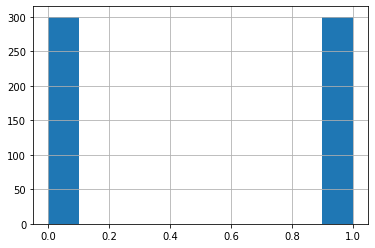

In [24]:
df_random[df_random.labeling=='train'].severity_level.hist()

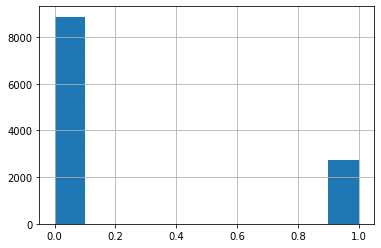

In [25]:
df_random[df_random.labeling=='test'].severity_level.hist()

# API

In [26]:
!pip install ktrain --quiet
!pip install https://github.com/amaiya/stellargraph/archive/refs/heads/no_tf_dep_082.zip --quiet
!pip install -U sentence-transformers --quiet

     |████████████████████████████████| 25.3 MB 87.5 MB/s 
     |████████████████████████████████| 981 kB 28.7 MB/s 
     |████████████████████████████████| 263 kB 61.6 MB/s 
     |████████████████████████████████| 3.8 MB 48.8 MB/s 
     |████████████████████████████████| 1.3 MB 78.4 MB/s 
     |████████████████████████████████| 468 kB 46.0 MB/s 
     |████████████████████████████████| 880 kB 75.7 MB/s 
     |████████████████████████████████| 6.6 MB 44.1 MB/s 
     |████████████████████████████████| 120 kB 75.6 MB/s 
     | 7.3 MB 958 kB/s
     |████████████████████████████████| 85 kB 2.8 MB/s 


In [27]:
import pandas as pd
from tqdm.notebook import tqdm
import networkx as nx
import numpy as np
import ktrain
from ktrain import graph as gr
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import KBinsDiscretizer

# GraphRiskMatrix
class GRM:

  cache = {}

  def __init__(self):
    self.infos = []
    self.p = None
    self.patch = None

  def generate_impact_graph(self, patch):
    self.patch = patch
    df = pd.read_pickle(patch)
    G = nx.Graph()

    language_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

    def get_text_features(txt):
      global cache
      if txt in self.cache:
        return self.cache[txt]
      
      features = language_model.encode(txt)
      self.cache[txt]=features
      return features

    for index,row in tqdm(df.iterrows(),total=len(df)):
      product_category = row['Product Category']
      product_sub_category = row['Product Sub Category']
      product_type = row['Product Type']
      risk_type = row['risk_type']
      risk_context = row['risk_context']
      label = row['severity_level']
      incident = str(index)+' - '+row['snippet']

      G.add_edge(incident,product_category)
      G.add_edge(incident,product_sub_category)
      G.add_edge(incident,product_type)
      G.add_edge(incident,risk_context)

      G.nodes[incident]['features'] = get_text_features(row['snippet'])
      G.nodes[product_category]['features'] = get_text_features(product_category)
      G.nodes[product_sub_category]['features'] = get_text_features(product_sub_category)
      G.nodes[product_type]['features'] = get_text_features(product_type)
      G.nodes[risk_context]['features'] = get_text_features(risk_context)
      G.nodes[incident]['severity_level'] = label
      G.nodes[incident]['labeling'] = row['labeling']
      G.nodes[incident]['product_category'] = product_category
      G.nodes[incident]['product_sub_category'] = product_sub_category
      G.nodes[incident]['product_type'] = product_type
      G.nodes[incident]['risk_type'] = risk_type
      G.nodes[incident]['risk_context'] = risk_context
      G.nodes[incident]['incident_description'] = row['Incident Description']
    

    node_id = 1
    for node in G.nodes():
      G.nodes[node]['node_id']= 'node_id' + str(node_id)
      node_id+=1

    return G

  def fit(self, G, epochs = 100, lr = 0.01, early_stopping = 10):
    L = []
    train_counter = 0
    for node in G.nodes:
        v = []
        v.append(G.nodes[node]['node_id'])
        for f in G.nodes[node]['features']: v.append(f)
        if 'severity_level' in G.nodes[node] and G.nodes[node]['labeling']=='train':
            v.append(G.nodes[node]['severity_level'])
            train_counter += 1
        else: v.append('?')
        L.append(v)
    pd.DataFrame(L).to_csv('graph-nodes.tab',sep="\t",index=False,header=None)

    L = []
    for edge in G.edges():
        L.append([ G.nodes[edge[0]]['node_id'] , G.nodes[edge[1]]['node_id'] ])

    pd.DataFrame(L).to_csv('graph-edges.tab',sep = "\t",index=False,header=None)

    (train_data, val_data, preproc, df_holdout, G_complete) = gr.graph_nodes_from_csv(
                                                            'graph-nodes.tab',
                                                            'graph-edges.tab',
                                                            holdout_for_inductive = False,
                                                            train_pct = 0.95,
                                                            sep='\t',
                                                            missing_label_value = '?',
                                                            sample_size = 16,
                                                            use_lcc = False,
                                                            random_state = 43, verbose = True)
    
    learner = ktrain.get_learner(model = gr.graph_node_classifier('graphsage', train_data,  layer_sizes = [32,32],verbose = False), 
                                train_data = train_data, 
                                val_data = val_data, 
                                batch_size = 8)
    
    
    print("Num of train nodes:", train_counter)

    print('\nTraining')

    learner.autofit(lr, epochs = epochs, early_stopping = early_stopping)
    p = ktrain.get_predictor(learner.model, preproc)
    self.p = p

  def predict(self, G):
    ids = []
    incident_description = []
    test_data = []
    text_incident = []
    product_category = []
    product_sub_category = []
    product_type = []
    risk_type = []
    risk_context = []
    labeling = []
    y_true = []
    
    ids_test = []
    y_true_test = []

    for node in G.nodes():
      if 'labeling' in G.nodes[node]:
        ids.append(G.nodes[node]['node_id'])
        incident_description.append(G.nodes[node]['incident_description'])
        product_category.append(G.nodes[node]['product_category'])
        product_sub_category.append(G.nodes[node]['product_sub_category'])
        product_type.append(G.nodes[node]['product_type'])
        risk_type.append(G.nodes[node]['risk_type'])
        risk_context.append(G.nodes[node]['risk_context'])
        labeling.append(G.nodes[node]['labeling'])
        y_true.append(str(G.nodes[node]['severity_level']))

        if G.nodes[node]['labeling']=='test':
          ids_test.append(G.nodes[node]['node_id'])
          y_true_test.append(str(G.nodes[node]['severity_level']))

    print('Predicting')
    y_pred = self.p.predict_transductive(ids, return_proba=False)
    y_pred_proba = self.p.predict_transductive(ids, return_proba=True)
    y_pred_test = self.p.predict_transductive(ids_test, return_proba=False)

    self.infos = [y_true, y_pred, y_pred_proba, ids, incident_description, product_category, product_sub_category, product_type, risk_type, risk_context, labeling, y_true_test, y_pred_test]

    return y_pred

  def __predictByCategory(self, G):
    df = pd.read_pickle(self.patch)  
    productCategory = df['Product Category'].unique()

    df_result =  pd.DataFrame(columns=['Category', 'Accuracy', 'F1-Macro'])

    for nameCategory in productCategory:
      id_test = []
      y_true = []

      for node in G.nodes():
        if ('labeling' in G.nodes[node] and G.nodes[node]['labeling']=='test' and (str(nameCategory) in G[node] and G.nodes[node]['product_category'] == str(nameCategory))):
          id_test.append(G.nodes[node]['node_id'])
          y_true.append(str(G.nodes[node]['severity_level']))

      y_pred = self.p.predict_transductive(id_test, return_proba=False)

      acc = accuracy_score(y_true, y_pred)
      f1 = f1_score(y_true, y_pred, average='macro')

      result = {'Category': nameCategory, 'Accuracy': acc, 'F1-Macro': f1}

      df_result = df_result.append(result, ignore_index=True)

    return df_result

  def __predictByRiskType(self, G):
    df = pd.read_pickle(self.patch)  
    riskType = df['risk_type'].unique()

    df_result =  pd.DataFrame(columns=['Risk Type', 'Accuracy', 'F1-Macro'])

    for nameRiskType in riskType:
      id_test = []
      y_true = []

      for node in G.nodes():
        if ('labeling' in G.nodes[node] and G.nodes[node]['labeling']=='test' and G.nodes[node]['risk_type'] == str(nameRiskType)):
          id_test.append(G.nodes[node]['node_id'])
          y_true.append(str(G.nodes[node]['severity_level']))

      y_pred = self.p.predict_transductive(id_test, return_proba=False)

      acc = accuracy_score(y_true, y_pred)
      f1 = f1_score(y_true, y_pred, average='macro')

      result = {'Risk Type': nameRiskType, 'Accuracy': acc, 'F1-Macro': f1}

      df_result = df_result.append(result, ignore_index=True)

    return df_result

  def centrality(self, G):
    features = []
    
    for node in G.nodes():
      if 'labeling' in G.nodes[node]:
        features.append(G.nodes[node]['features'])

    knn_graph = kneighbors_graph(features, n_neighbors = 5, mode='connectivity', include_self=True)
    knn_graph.toarray()
    new_G = nx.from_numpy_matrix(knn_graph, parallel_edges = False)

    centrality = nx.closeness_centrality(new_G)

    return centrality

  def results(self, G):
    acc = accuracy_score(self.infos[11], self.infos[12])
    f1 = f1_score(self.infos[11], self.infos[12], average='macro')

    result = {'': 'Total', 'Accuracy': acc, 'F1-Macro': f1}
    df_result = pd.DataFrame.from_dict(result, orient = 'index')

    resultCategory = self.__predictByCategory(G)
    resultRiskType = self.__predictByRiskType(G)

    return df_result, resultCategory, resultRiskType

  def risk_matrix(self, info_proba):
    df = pd.DataFrame()
    df['ID'] = self.infos[3]
    df['Incident Description'] = self.infos[4]
    df['Product Category'] = self.infos[5]
    df['Product Sub Category'] = self.infos[6]
    df['Product Type'] = self.infos[7]
    df['Risk Type'] = self.infos[8]
    df['Risk Context'] = self.infos[9]

    est = KBinsDiscretizer(n_bins = 3, encode='onehot', strategy='kmeans')
    x = est.fit_transform(self.infos[2])

    df['Real Impact'] = self.infos[0]
    df['Predicted Impact'] = self.infos[1]
    df['Impact Precision'] = [max(map(float, i)) for i in self.infos[2]]
    df['Bin Impact'] = np.argmax(x.toarray(), axis=1)

    est = KBinsDiscretizer(n_bins = 4, encode='onehot', strategy='kmeans')
    x = est.fit_transform([[i] for i in info_proba])

    df['Closeness Centrality'] = info_proba.values()
    df['Bin Closeness Centrality'] = np.argmax(x.toarray(), axis=1)

    df['labeling'] = self.infos[10]

    return df

# Example

In [28]:
#Generate object of class
GRM = GRM()

#Generate impact graph
G = GRM.generate_impact_graph("data/datasets/dataset_random.pkl")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

  0%|          | 0/12191 [00:00<?, ?it/s]

In [29]:
#Train graph
GRM.fit(G)

using 10982 nodes with missing target as holdout set
Size of training graph: 11454 nodes
Training nodes: 448
Validation nodes: 24
Nodes treated as unlabeled for testing/inference: 10982
Holdout node features are visible during training (transductive inference)

Num of train nodes: 472

Training


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/100
56/56 [==============================] - 3s 28ms/step - loss: 0.6616 - accuracy: 0.5938 - val_loss: 0.5595 - val_accuracy: 0.7500
Epoch 2/100
56/56 [==============================] - 1s 21ms/step - loss: 0.5737 - accuracy: 0.7098 - val_loss: 0.5070 - val_accuracy: 0.6667
Epoch 3/100
56/56 [==============================] - 1s 21ms/step - loss: 0.5599 - accuracy: 0.7210 - val_loss: 0.4885 - val_accuracy: 0.7917
Epoch 4/100
56/56 [==============================] - 1s 22ms/step - loss: 0.5310 - accuracy: 0.7388 - val_loss: 0.4902 - val_accuracy: 0.7917
Epoch 5/100
56/56 [==============================] - 1s 21

In [30]:
#Predit test data
y_pred = GRM.predict(G)

Predicting


In [31]:
#Get results
generalResult, categoryResult, riskTypeResult =  GRM.results(G)

In [32]:
#Save results

#How to csv
generalResult.to_csv('data/results/csv/generalResults.csv')
categoryResult.to_csv('data/results/csv/categoryResult.csv')
riskTypeResult.to_csv('data/results/csv/riskTypeResult.csv')

#How to pkl

generalResult.to_pickle('data/results/pkl/generalResults.pkl')
categoryResult.to_pickle('data/results/pkl/categoryResult.pkl')
riskTypeResult.to_pickle('data/results/pkl/riskTypeResult.pkl')

In [33]:
generalResult

,0
,Total
Accuracy,0.842654
F1-Macro,0.757542


In [34]:
categoryResult

,Category,Accuracy,F1-Macro
0,Kitchen,0.876471,0.622926
1,Personal Care,0.638235,0.624512
2,"Furniture, Furnishings & Decorations",0.824921,0.810122
3,Electronics,0.814066,0.769687
4,Home Maintenance and Structures,0.850272,0.733423
5,Clothing and Accessories,0.876812,0.691113
6,Sports and Recreation,0.775100,0.753953
7,Yard & Garden,0.801095,0.607230
8,Toys & Children,0.754967,0.746242
9,"Fuel, Lighters and Fireworks",0.629032,0.482396


In [35]:
riskTypeResult

,Risk Type,Accuracy,F1-Macro
0,fire,0.870095,0.531797
1,smell,0.838163,0.693300
2,electrical issue,0.686747,0.655492
3,skin rashes,0.978313,0.494519
4,lawsuit,0.546358,0.466245
5,smoke,0.866667,0.518657
6,electric shock,0.684211,0.683333
7,explode,0.818182,0.482974
8,allergy,0.938406,0.484112
9,CO/CO2,0.623824,0.433191


In [36]:
#Calculate centrality metric
centrality = GRM.centrality(G)

In [37]:
#Generate risk matrix
risk_matrix = GRM.risk_matrix(centrality)

In [38]:
risk_matrix

,ID,Incident Description,Product Category,Product Sub Category,Product Type,Risk Type,Risk Context,Real Impact,Predicted Impact,Impact Precision,Bin Impact,Closeness Centrality,Bin Closeness Centrality,labeling
0,node_id1,Upright freezer began putting off an odd smell...,Kitchen,Appliances,Freezers (Separate From Refrigerators) (263),fire,caught on fire,0,0,0.774416,2,0.185098,0,train
1,node_id6,I was using my Oster Toaster and noticed a bur...,Kitchen,Appliances,Toasters (234),smell,burning smell,1,0,0.775472,2,0.183860,0,test
2,node_id9,Revlon 1875 model RV473 hair dryer caught on f...,Personal Care,Grooming,Hair Dryers (1602),fire,caught on fire,1,1,0.504156,1,0.156080,0,train
3,node_id13,The consumer stated that she had her dishwashe...,Kitchen,Appliances,Dishwashers (214),fire,sparks,0,0,0.840307,2,0.175234,0,train
4,node_id16,I purchased a pair of 18 inch red glitter bees...,"Furniture, Furnishings & Decorations",Candles,"Candles, Candlesticks and Other Candle Holders...",fire,caught fire,0,0,0.708428,2,0.173617,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,node_id11450,So far I have purchased 2 expensive La Z Boy L...,"Furniture, Furnishings & Decorations",Furniture,Recliner Chair (670),allergy,allergic reaction,1,1,0.951495,0,0.135505,3,test
10821,node_id11451,(04/03/2018) The dishwasher was in use. After ...,Kitchen,Appliances,Dishwashers (214),fire,sparks,0,0,0.827467,2,0.193517,3,test
10822,node_id11452,I purchased a Sharp Drawer Microwave (model KB...,Kitchen,Appliances,Microwave Ovens (264),fire,sparks,0,0,0.786163,2,0.173548,3,test
10823,node_id11453,Our Ninja Coffee Bar coffee maker caught fire....,Kitchen,Appliances,Electric Coffee Makers or Teapots (217),fire,caught fire,0,0,0.864426,2,0.136221,3,test
